## EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering
### Name:  Kavinda W.M.C.
### Index: 200301D

Import Libraries

In [54]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

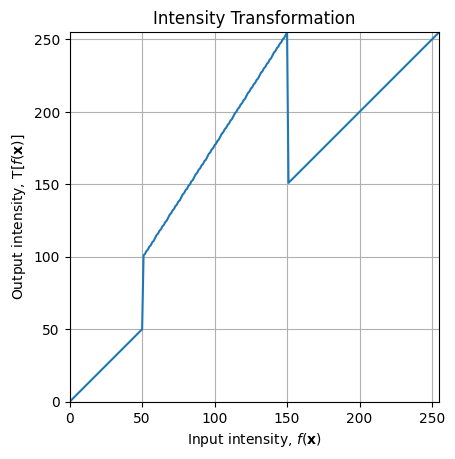

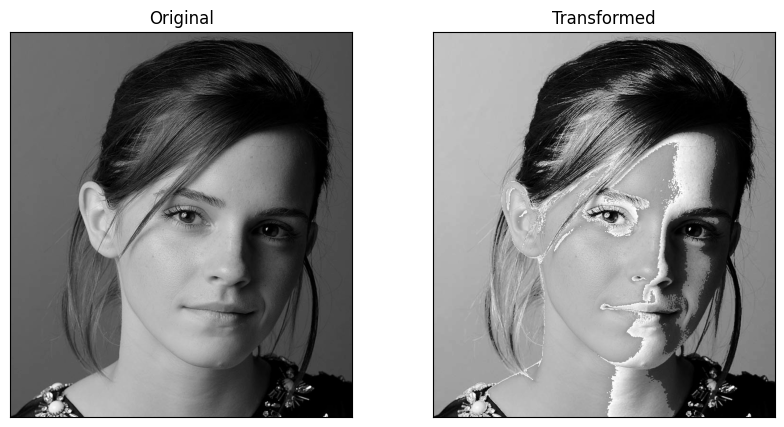

In [55]:
c = np.array([(50, 50), (50, 100), (150,255), (150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.grid()
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_title('Intensity Transformation')
plt.show()
img_orig = cv.imread ('emma.jpg' , cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (10, 5))
axes[0].imshow(img_orig, cmap= 'gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap= 'gray')
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Question 2

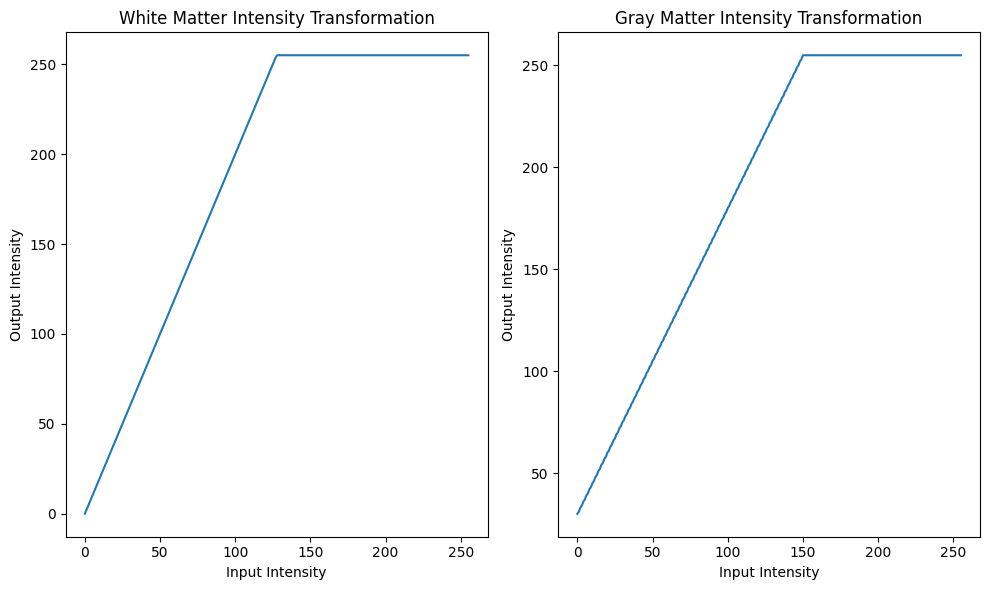

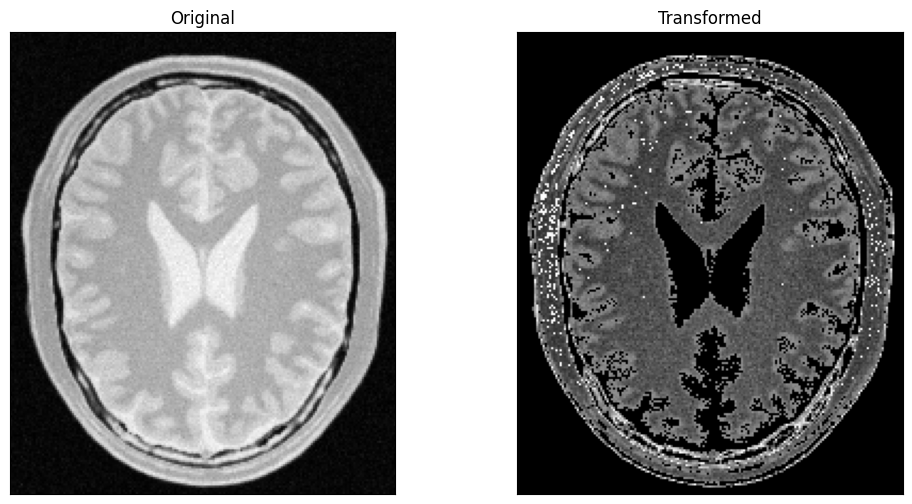

In [56]:
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Define the transformation functions for white matter and gray matter
# You can adjust the parameters and shapes of these functions to suit your needs
def white_matter_transform(x):
    return np.clip(2 * x, 0, 255).astype('uint8')

def gray_matter_transform(x):
    return np.clip(1.5 * x + 30, 0, 255).astype('uint8')

# Apply the transformations to the respective intensity ranges
white_matter_indices = np.where((img_orig >= 150) & (img_orig <= 200))
gray_matter_indices = np.where((img_orig >= 50) & (img_orig < 150))

img_transformed = np.zeros_like(img_orig)
img_transformed[white_matter_indices] = white_matter_transform(img_orig[white_matter_indices])
img_transformed[gray_matter_indices] = gray_matter_transform(img_orig[gray_matter_indices])

# Plot the intensity transformations
x = np.arange(256)
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(x, white_matter_transform(x), label='White Matter')
plt.title('White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.subplot(1, 2, 2)
plt.plot(x, gray_matter_transform(x), label='Gray Matter')
plt.title('Gray Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (12, 6))
axes[0].imshow(img_orig, cmap= 'gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_transformed, cmap= 'gray')
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()



Question 3(a)

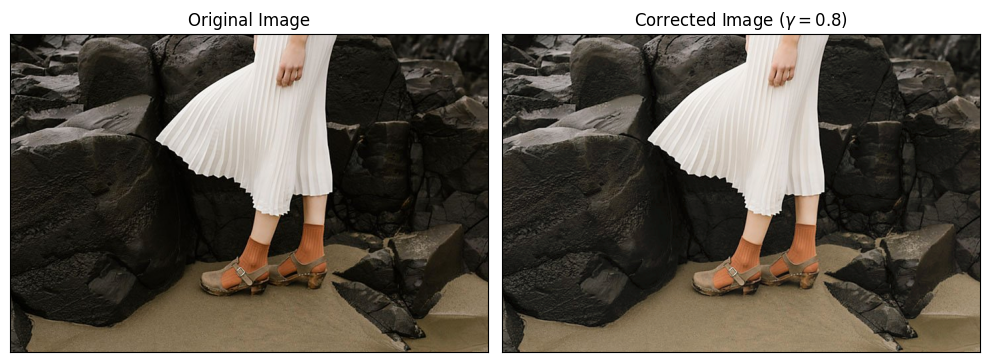

In [57]:
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

L_channel = img_lab[:, :, 0]
gamma = 0.8
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_corrected = cv.LUT(L_channel, table)
img_lab[:, :, 0] = L_corrected
img_corrected_bgr = cv.cvtColor(img_lab, cv.COLOR_Lab2BGR)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB))
plt.title(f'Corrected Image ($\gamma = {gamma}$)')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


Question 3(b)

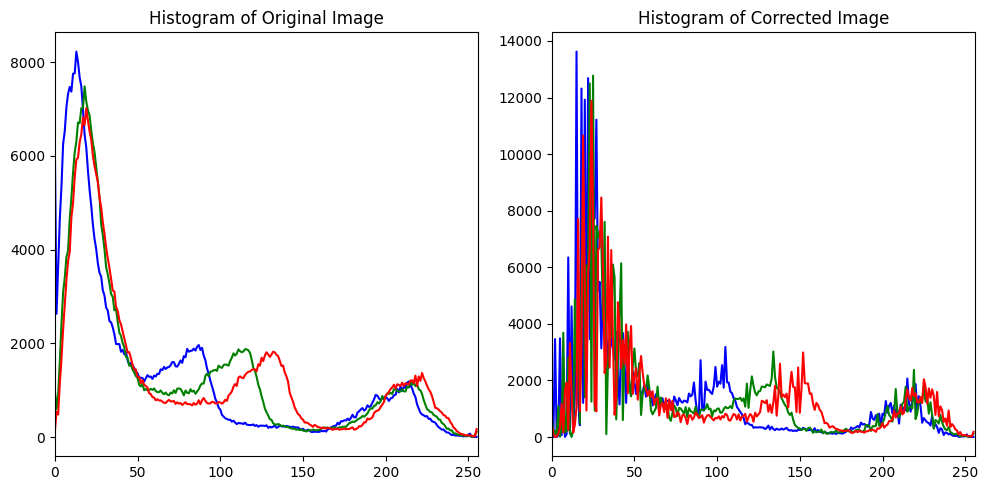

In [58]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    ax[0].plot(hist_orig, color = c) 
ax[0].set_xlim([0,256])
ax[0].set_title('Histogram of Original Image')

for i,c in enumerate(color):
    hist_corrected = cv.calcHist([img_corrected_bgr], [i], None, [256], [0, 256])
    ax[1].plot(hist_corrected, color = c) 
ax[1].set_xlim([0,256])
ax[1].set_title('Histogram of Corrected Image')
plt.tight_layout()
plt.show()


Question 4

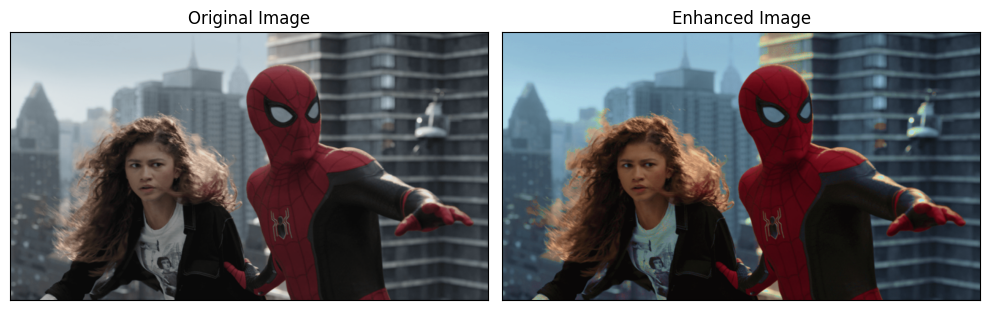

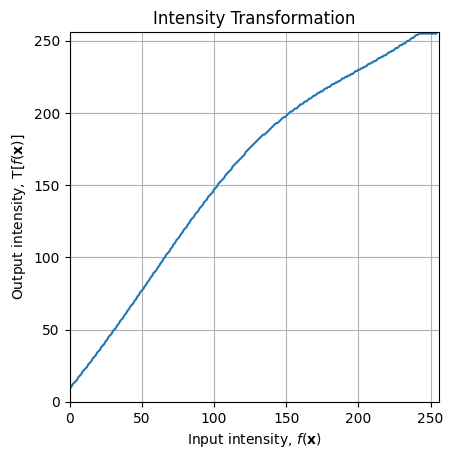

In [59]:
image = cv.imread('spider.png', cv.IMREAD_COLOR)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# (a) Split into HSV planes
hue, saturation, value = cv.split(hsv_image)

# (b) Apply the intensity transformation to the saturation plane
def intensity_transformation(x, a, sigma=70):
    f_x = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255).astype('uint8')
    return f_x

a = 0.4
transformed_saturation = intensity_transformation(saturation, a)

# (d) Recombine the three planes
enhanced_hsv_image = cv.merge([hue, transformed_saturation, value])

# Convert back to BGR for visualization
enhanced_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)

# (e) Display the images and intensity transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
x = np.arange(0, 255)
f_x = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * 70 ** 2)), 255).astype('uint8')
ax.plot(x, f_x)
ax.grid()
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,256)
ax.set_ylim(0,256)
ax.set_aspect('equal')
ax.set_title('Intensity Transformation')
plt.show()

Question 5

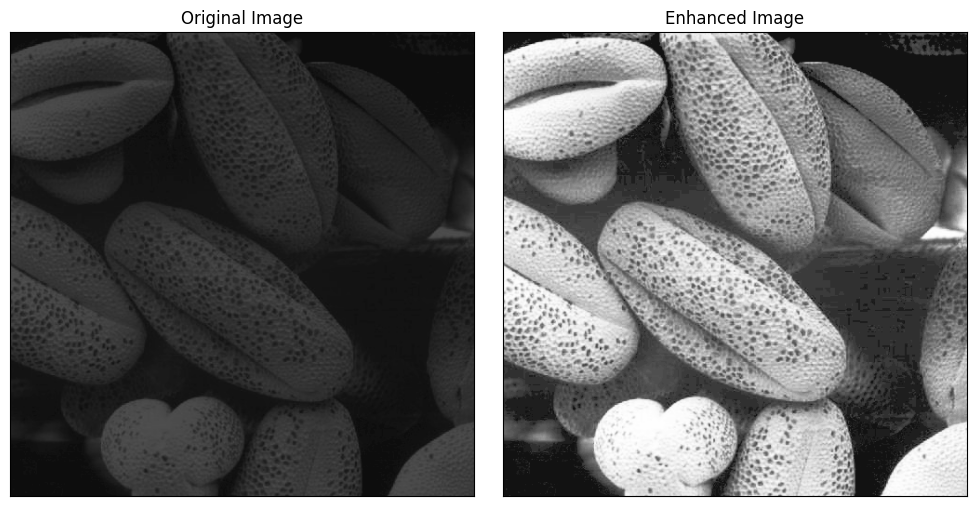

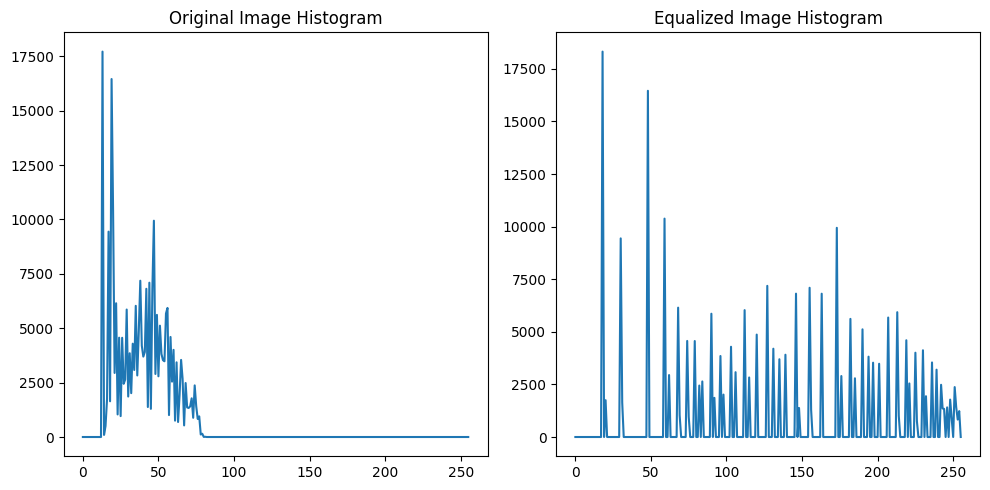

In [60]:
def histogram_equalization(image):
   
    histogram_orig = cv.calcHist([image], [0], None, [256], [0,256])
    cdf = np.cumsum(histogram_orig)
    equalized_hist = (cdf * 255 / cdf.max()).astype('uint8')
    equalized_image = cv.LUT(image, equalized_hist).astype('uint8')

    return equalized_image

image = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

equalized_image = histogram_equalization(image)

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# Plot histograms before and after equalization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
histogram_orig = cv.calcHist([image], [0], None, [256], [0,256])
plt.plot(histogram_orig)
plt.title('Original Image Histogram')

plt.subplot(1, 2, 2)
histogram_eqaulized = cv.calcHist([equalized_image], [0], None, [256], [0,256])
plt.plot(histogram_eqaulized)
plt.title('Equalized Image Histogram')

plt.tight_layout()
plt.show()

